In [72]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [73]:
!pip install tables

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab 
import scipy.stats as stats

In [0]:
#Path here
base_path = '/content/drive/My Drive/stocks_project/'
sp500_path = '/content/drive/My Drive/stocks_project/data/sp/^GSPC.csv'
technical500_path = base_path + 'data/created/technical500.h5'

# Import module

In [0]:
#Use the shortcut Ctrl+Shift+M to add a comment to the currently selected cell.

#!pip install intrinio

#import intrinio
#intrinio.client.username = '743b5f438c88000ffc6332758029b212'
#intrinio.client.password = 'ce548e14e41df641d828602e11612375'

#data = intrinio.prices('AAPL', start_date='1990-01-01', end_date='2018-11-10')
#data.head()

In [0]:
#data.drop(['date'], axis=1, inplace=True)

# Import RAW csv file

https://finance.yahoo.com/quote/%5EGSPC/history?period1=631123200&period2=1539187200&interval=1d&filter=history&frequency=1d

In [78]:
data = pd.read_csv(sp500_path)
data.index = pd.to_datetime(data.Date, format='%Y-%m-%d')
data.drop(['Date'], axis=1, inplace=True)

data.tail(10)

Open         High          Low        Close    Adj Close  \
Date                                                                          
2018-09-27  2911.649902  2927.219971  2909.270020  2914.000000  2914.000000   
2018-09-28  2910.030029  2920.530029  2907.500000  2913.979980  2913.979980   
2018-10-01  2926.290039  2937.060059  2917.909912  2924.590088  2924.590088   
2018-10-02  2923.800049  2931.419922  2919.370117  2923.429932  2923.429932   
2018-10-03  2931.689941  2939.860107  2921.360107  2925.510010  2925.510010   
2018-10-04  2919.350098  2919.780029  2883.919922  2901.610107  2901.610107   
2018-10-05  2902.540039  2909.639893  2869.290039  2885.570068  2885.570068   
2018-10-08  2877.530029  2889.449951  2862.080078  2884.429932  2884.429932   
2018-10-09  2882.510010  2894.830078  2874.270020  2880.340088  2880.340088   
2018-10-10  2873.899902  2874.020020  2784.860107  2785.679932  2785.679932   

                Volume  
Date                    
2018-09-27  3060850000  
2018-09-28  3432300000  
2018-10-01  3364190000  
2018-10-02  3401880000  
2018-10-03  3598710000  
2018-10-04  3496860000  
2018-10-05  3328980000  
2018-10-08  3330320000  
2018-10-09  3520500000  
2018-10-10  4501250000

In [79]:
data.shape

(7252, 6)

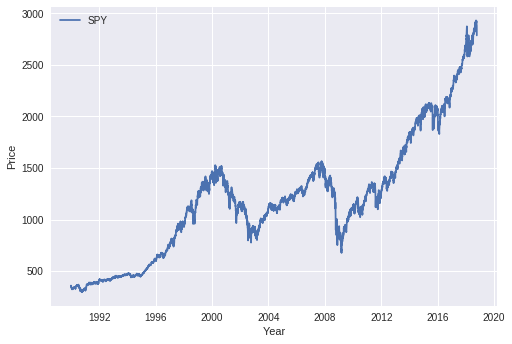

In [80]:
plt.plot(data.index, data['Adj Close'])
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend(['SPY'])
plt.show()


#plt.plot(data.index, data['adj_close'])
#plt.xlabel('Year')
#plt.ylabel('Price')
#plt.legend(['APPLE'])
#plt.show()

# Check for normal distribution
Have a look at the distribution of our price change

((array([-3.73039803, -3.50069273, -3.37436547, ...,  3.37436547,
          3.50069273,  3.73039803]),
  array([-0.09034978, -0.08929524, -0.08806776, ...,  0.07075755,
          0.10789006,  0.11580037])),
 (0.010541411804678429, 0.00034319177407760216, 0.9555978902748354))

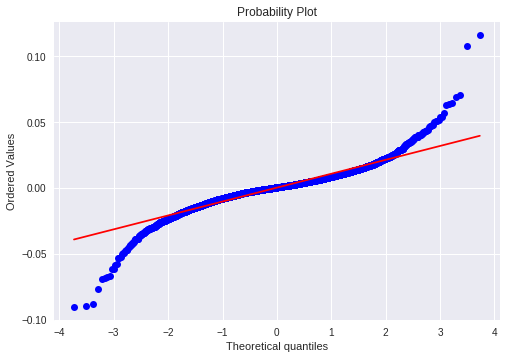

In [81]:
#data['pct_chg'] = data['adj_close'].pct_change()[1:]
#data.dropna(inplace=True, axis=0)
#stats.probplot(data['pct_chg'], dist="norm", plot=pylab)

data['pct_chg'] = data['Adj Close'].pct_change()[1:]
data.dropna(inplace=True, axis=0)
stats.probplot(data['pct_chg'], dist="norm", plot=pylab)

# Log transformation
Though the target variable is not normally distributed, as long as the residuals are normally dis

((array([-3.73036328, -3.50065597, -3.37432751, ...,  3.37432751,
          3.50065597,  3.73036328]),
  array([-0.09469512, -0.09353652, -0.09218959, ...,  0.06836639,
          0.10245736,  0.10957197])),
 (0.01054599246958542, 0.0002827025647164591, 0.9552081956279648))

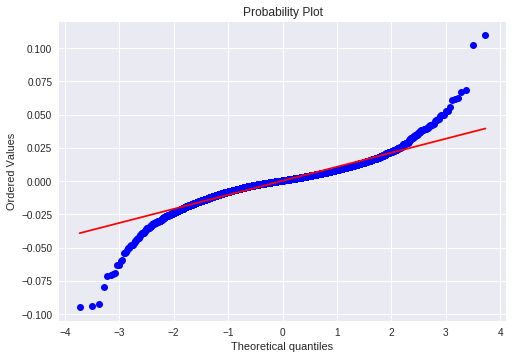

In [82]:
#data['lrets'] = np.log(data['adj_close']/data['adj_close'].shift(1))
#data.dropna(inplace=True, axis=0)
#stats.probplot(data['lrets'], dist="norm", plot=pylab)

data['lrets'] = np.log(data['Adj Close']/data['Adj Close'].shift(1))
data.dropna(inplace=True, axis=0)
stats.probplot(data['lrets'], dist="norm", plot=pylab)

# Technical indicator 
- MACD (Trend)
- Stochastics (Momentum)
- Average True Range (Volume)

Similar code from https://github.com/alberduris/SirajsCodingChallenges/tree/master/Stock%20Market%20Prediction

# MACD: 

The Moving Average Convergence/Divergence oscillator (MACD) is one of the simplest and most effective momentum indicators available. The MACD turns two trend-following indicators, moving averages, into a momentum oscillator by subtracting the longer moving average from the shorter moving average.

In [0]:
def MACD(df, period1, period2, periodSignal):
    EMA1 = pd.DataFrame.ewm(df,span=period1).mean() # Provides exponential weighted functions
    EMA2 = pd.DataFrame.ewm(df,span=period2).mean() 
    
    MACD = EMA1-EMA2
    Signal = pd.DataFrame.ewm(MACD,periodSignal).mean()
    
    Histogram = MACD-Signal
    return Histogram

# Stochastics oscillator: 

The Stochastic Oscillator is a momentum indicator that shows the location of the close relative to the high-low range over a set number of periods.

In [0]:
def stochastics_oscillator(df,period):
    l, h = pd.DataFrame.rolling(df, period).min(), pd.DataFrame.rolling(df, period).max()
    k = 100 * (df - l) / (h - l)
    return k

# Average True Range: 

Is an indicator to measure the volalitility (NOT price direction). The largest of:

Method A: Current High less the current Low
Method B: Current High less the previous Close (absolute value)
Method C: Current Low less the previous Close (absolute value)

Will use EGARCH to find volatility in the future

In [0]:
#def ATR(df,period):
    #df['H-L'] = abs(df['high']-df['low'])
    #df['H-PC'] = abs(df['high']-df['close'].shift(1))
    #df['L-PC'] = abs(df['low']-df['close'].shift(1))
    #TR = df[['H-L','H-PC','L-PC']].max(axis=1)
    #return TR.to_frame()
  
  
def ATR(df,period):
    '''
    Method A: Current High less the current Low
    '''
    df['H-L'] = abs(df['High']-df['Low'])
    df['H-PC'] = abs(df['High']-df['Close'].shift(1))
    df['L-PC'] = abs(df['Low']-df['Close'].shift(1))
    TR = df[['H-L','H-PC','L-PC']].max(axis=1)
    return TR.to_frame()

# Combine it all

In [86]:
#macd = MACD(data['adj_close'], 12, 26,9)
#macd.rename(columns={'close':'MACD'}, inplace=True)
#macd.tail()

macd = MACD(data['Adj Close'], 12, 26,9)
macd.rename(columns={'Close':'MACD'}, inplace=True)
macd.tail()

Date
2018-10-04    -3.498974
2018-10-05    -5.951191
2018-10-08    -7.726477
2018-10-09    -9.170761
2018-10-10   -16.827594
dtype: float64

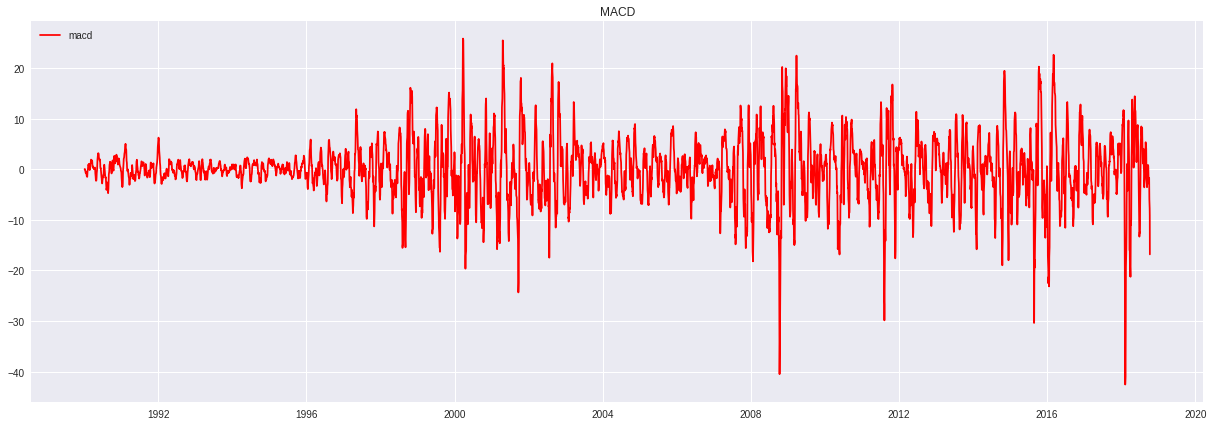

In [87]:
plt.figure(figsize=(21,7))
plt.plot(macd,label='macd',color='red')
plt.title('MACD')
plt.legend(loc='upper left')
plt.show()

In [88]:
#stochastics = stochastics_oscillator(data['adj_close'], 14)
#stochastics.rename(columns={'close':'Stochastics'}, inplace=True)
#stochastics.tail()

stochastics = stochastics_oscillator(data['Adj Close'], 14)
stochastics.rename(columns={'Close':'Stochastics'}, inplace=True)
stochastics.tail()

Date
2018-10-04    30.536527
2018-10-05     0.000000
2018-10-08     0.000000
2018-10-09     0.000000
2018-10-10     0.000000
dtype: float64

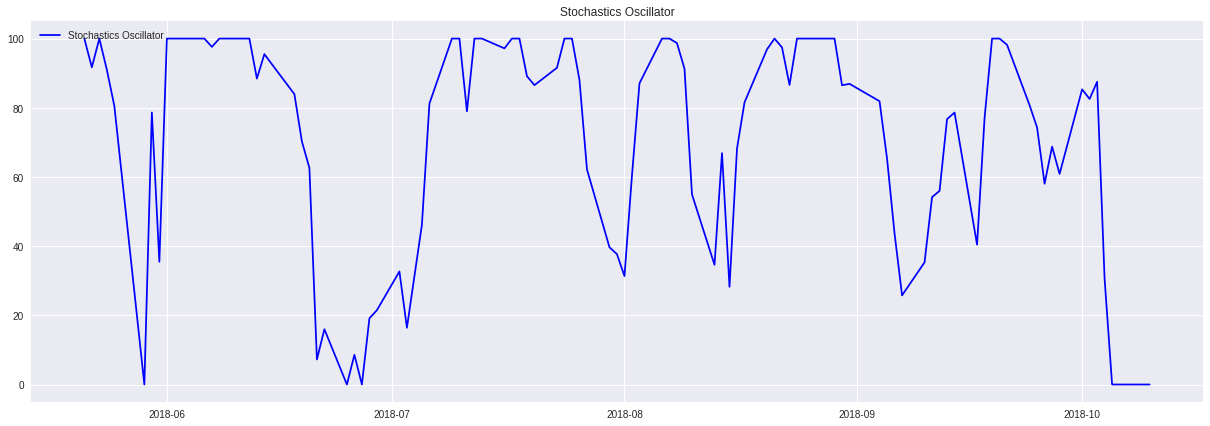

In [89]:
plt.figure(figsize=(21,7))
plt.plot(stochastics[-100:],label='Stochastics Oscillator',color='blue')
plt.title('Stochastics Oscillator')
plt.legend(loc='upper left')
plt.show()

In [90]:
#atr = ATR(data,14)
#atr.rename(columns={0:'ATR'}, inplace=True)
#atr.tail()

atr = ATR(data,14)
atr.rename(columns={0:'ATR'}, inplace=True)
atr.tail()

ATR
Date                 
2018-10-04  41.590088
2018-10-05  40.349854
2018-10-08  27.369873
2018-10-09  20.560058
2018-10-10  95.479981

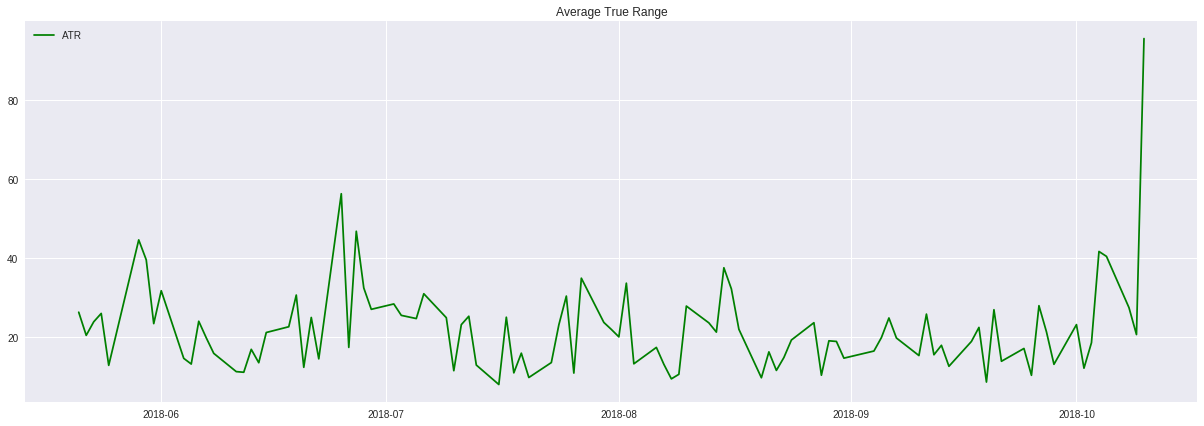

In [91]:
plt.figure(figsize=(21,7))
plt.plot(atr[-100:],label='ATR',color='green')
plt.title('Average True Range')
plt.legend(loc='upper left')
plt.show()

In [0]:
data = pd.concat([data, macd, stochastics, atr], axis=1)

In [0]:
data.rename(columns={0:'MACD', 1:'stochastics'}, inplace=True)

In [94]:
data.drop(['pct_chg', 'H-L', 'H-PC', 'L-PC'], axis=1 , inplace=True)
data.tail()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2018-10-04  2919.350098  2919.780029  2883.919922  2901.610107  2901.610107   
2018-10-05  2902.540039  2909.639893  2869.290039  2885.570068  2885.570068   
2018-10-08  2877.530029  2889.449951  2862.080078  2884.429932  2884.429932   
2018-10-09  2882.510010  2894.830078  2874.270020  2880.340088  2880.340088   
2018-10-10  2873.899902  2874.020020  2784.860107  2785.679932  2785.679932   

                Volume     lrets       MACD  stochastics        ATR  
Date                                                                 
2018-10-04  3496860000 -0.008203  -3.498974    30.536527  41.590088  
2018-10-05  3328980000 -0.005543  -5.951191     0.000000  40.349854  
2018-10-08  3330320000 -0.000395  -7.726477     0.000000  27.369873  
2018-10-09  3520500000 -0.001419  -9.170761     0.000000  20.560058  
2018-10-10  4501250000 -0.033416 -16.827594     0.000000  95.479981

# Export it as HDF

In [0]:
data.to_hdf(technical500_path, key='data')

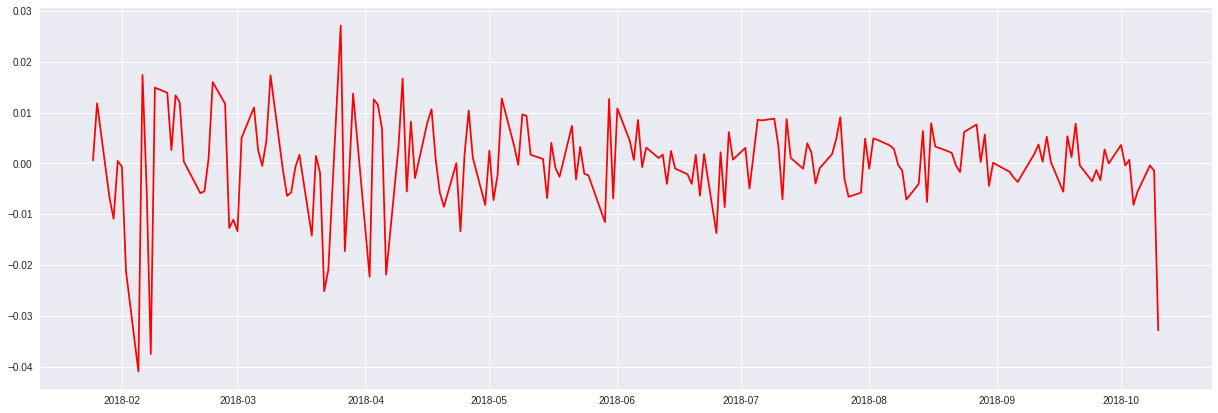

In [96]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 

data = pd.read_hdf(technical500_path, 'data')

plt.figure(figsize=(21,7))
plt.plot(data.index[-180:], np.expm1(data['lrets'][-180:]), color='red', label='Prediction')